# **Tuning Hyperparameters of Machine Learning Model**

ABRAHAM

In this Jupyter notebook, we will be tuning hyperparameters of a classification model built by random forest algorithm using scikit-learn package in Python.

## **1. Make synthetic dataset**

### **1.1. Generate the dataset**

In [80]:
from sklearn.datasets import make_classification

X, Y = make_classification(n_samples=300, n_classes=2, n_features=14, n_redundant=0, random_state=1)

### **1.2. Let's examine the data dimension**

We can see that there are 300 rows (samples) and 14 columns (features) for the **X** variable and 300 rows and 1 column (class label) for the **Y** variable.

In [81]:
X.shape, Y.shape

((300, 14), (300,))

## **2. Data split (80/20 ratio)**

### **2.1. Data split**

A ratio of 80/20 is used for data splitting such that 80% goes to the training subset and 20% to the testing subset.

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### **2.2. Let's examine the data dimension**

Here we see that the **training set** has 300 rows and 14 columns while there are 300 rows and 1 column for the **Y** variable.

In [83]:
X_train.shape, Y_train.shape

((240, 14), (240,))

The **testing set** has 240 rows and 14 columns for the **X** variable while there are 240 rows and 1 column for the **Y** variable.

In [84]:
X_test.shape, Y_test.shape

((60, 14), (60,))

# **3. Building a simple machine learning model using Random Forest**

In the following blocks of codes, we will first start with building a random forest model. Finally, we will explore how to tune the hyperparameters (e.g. **n_estimators** and **max_features**) of the random forest algorithm. 

We first start by importing the necessary libraries and assigning the random forest classifier to the **rf** variable.

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(max_features=5, n_estimators=100)

Now, we will be applying the random forest classifier to build a classification model using the **rf.fit()** function on the training data (e.g. **X_train** and **Y_train**).

In [86]:
rf.fit(X_train, Y_train)

RandomForestClassifier(max_features=5)

In [87]:
import pandas as pd
pd.DataFrame(X)
#to show X in 2D

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.662095,-0.797286,-2.600642,1.523097,0.326813,-0.648636,-0.556268,-1.160443,0.406656,-0.725323,-0.582192,-0.600504,1.984411,-2.160628
1,-1.568511,-1.515450,0.573265,0.264868,0.886090,-0.587029,1.040038,0.318972,-0.623905,0.876200,-0.397126,0.261875,0.123255,-0.913443
2,-0.702848,-0.308567,-1.106573,-1.958169,-0.934182,0.095747,0.677808,0.542645,0.731403,1.033451,-0.857497,0.954496,-0.146273,-0.017455
3,0.669779,-0.162881,0.904620,-0.996085,0.997977,-0.188015,-0.873489,1.176571,0.861670,0.008589,0.565175,1.789185,-1.058647,-0.189644
4,-0.850315,4.285993,-0.324332,-0.181705,-0.309679,1.112349,2.208662,0.533367,0.275249,2.421589,0.919447,-1.155792,-0.674017,-0.163184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.727420,0.676476,-0.518151,0.230403,0.076646,-1.173573,0.800851,1.063674,-1.323172,-0.113523,-2.086995,1.715187,0.704552,1.231123
296,1.430881,-2.373015,0.331694,-0.801947,0.339025,-0.672743,0.998671,-1.776323,0.796531,0.094415,-1.835899,-0.070064,-1.456690,-0.423950
297,-1.147645,0.937768,1.702430,-2.329041,0.048051,-0.367832,0.334915,-0.698571,1.041440,-0.112299,-0.745644,1.569756,0.804123,0.988511
298,1.012960,-1.118795,-0.820905,-1.223351,-0.507257,-0.795439,-0.453503,1.128379,-0.172225,0.483665,0.540306,0.398072,-1.322762,-0.144793


In [88]:
X
#to show X in 1D

array([[-1.66209499, -0.79728561, -2.60064181, ..., -0.60050434,
         1.98441125, -2.160628  ],
       [-1.5685106 , -1.5154501 ,  0.57326545, ...,  0.26187548,
         0.12325546, -0.91344341],
       [-0.70284827, -0.30856652, -1.10657307, ...,  0.95449567,
        -0.14627327, -0.01745495],
       ...,
       [-1.14764549,  0.93776835,  1.70243005, ...,  1.56975551,
         0.80412285,  0.98851064],
       [ 1.01296047, -1.11879546, -0.82090537, ...,  0.39807179,
        -1.32276242, -0.14479311],
       [ 0.11685482,  1.21158356,  0.34432079, ..., -1.49682674,
         0.02260113, -0.31056366]])

In [89]:
pd.DataFrame(Y)
#to show Y in 2D

,0
0,0
1,0
2,0
3,0
4,1
...,...
295,1
296,0
297,1
298,0


In [90]:
Y
#to show Y in 1D

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1])

The **rf.score()** function will be used to calculate the accuracy score of the RF model in predicting the *test data* (**X_test**).

In [91]:
rf.score(X_test, Y_test)

0.8666666666666667

The following 2 code cells also calculate the accuracy score of the RF model in predicting the test data (X_test) but performs it in 2 steps using **rf.predict()** and **accuracy_score()** functions.

In [92]:
Y_pred = rf.predict(X_test)

In [93]:
accuracy_score(Y_pred, Y_test)

0.8666666666666667

The advantage of using this latter approach is that you have access to the predicted data values.

In [94]:
Y_pred, Y_test

(array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
        1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]))

# **4. Hyperparameter Tuning**

Now we will be performing the tuning of hyperparameters of Random forest model. The hyperparameters that we will tune includes **max_features** and the **n_estimators**.


Firstly, we will import the necessary modules.

The **GridSearchCV()** function from scikit-learn will be used to perform the hyperparameter tuning. Particularly, **GridSearchCV()** function can perform the typical functions of a classifier such as ***fit***, ***score*** and ***predict*** as well as ***predict_proba***, ***decision_function***, ***transform*** and ***inverse_transform***.

Secondly, we define variables that are necessary input to the GridSearchCV() function.


In [95]:
from sklearn.model_selection import GridSearchCV
import numpy as np

max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,210,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

rf = RandomForestClassifier()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [96]:

grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

In [97]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'max_features': 5, 'n_estimators': 150} with a score of 0.90


# **5. Dataframe of Grid search parameters and their Accuracy scores**

Finally, we will be exporting the grid search parameters and their resulting accuracy scores into a dataframe.

In [98]:
import pandas as pd

grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_results

,max_features,n_estimators,Accuracy
0,1,10,0.787500
1,1,20,0.833333
2,1,30,0.837500
3,1,40,0.854167
4,1,50,0.858333
...,...,...,...
95,5,160,0.887500
96,5,170,0.900000
97,5,180,0.891667
98,5,190,0.887500


# **6. Preparing data for making contour plots**

Prior to making contour plots, we will have to reshape the data into a compatible format that will be recognized by the contour plot functions.

Firstly, we will be using Pandas' **groupby()** function to segment the data into groups based on the 2 hyperparameters: **max_features** and **n_estimators**.

In [99]:
grid_contour = grid_results.groupby(['max_features','n_estimators']).mean()
grid_contour

Accuracy
max_features n_estimators          
1            10            0.787500
             20            0.833333
             30            0.837500
             40            0.854167
             50            0.858333
...                             ...
5            160           0.887500
             170           0.900000
             180           0.891667
             190           0.887500
             200           0.895833

[100 rows x 1 columns]

## **Pivoting the data**

Data is reshaped by pivoting the data into an m by n matrix where rows and columns correspond to the **max_features** and **n_estimators**, respectively.

In [100]:
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['max_features', 'n_estimators', 'Accuracy']
#grid_pivot = grid_reset.pivot('max_features', 'n_estimators') # if this line have TypeError: DataFrame.pivot() takes 1 positional argument but 3 were given use then next
grid_pivot = grid_reset.pivot(index='max_features', columns='n_estimators', values='Accuracy') #Pass the arguments to pivot as keyword arguments
grid_pivot

n_estimators,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200
max_features,,,,,,,,,,,,,,,,,,,,
1,0.787500,0.833333,0.837500,0.854167,0.858333,0.862500,0.858333,0.845833,0.858333,0.870833,0.883333,0.858333,0.875000,0.879167,0.875000,0.866667,0.879167,0.866667,0.875000,0.887500
2,0.845833,0.883333,0.875000,0.879167,0.875000,0.883333,0.887500,0.875000,0.891667,0.895833,0.879167,0.887500,0.883333,0.895833,0.895833,0.883333,0.891667,0.891667,0.887500,0.879167
3,0.845833,0.858333,0.875000,0.883333,0.879167,0.887500,0.883333,0.891667,0.895833,0.887500,0.879167,0.879167,0.895833,0.900000,0.891667,0.891667,0.883333,0.887500,0.891667,0.887500
4,0.866667,0.883333,0.887500,0.887500,0.883333,0.875000,0.879167,0.883333,0.891667,0.900000,0.895833,0.883333,0.895833,0.895833,0.887500,0.883333,0.891667,0.883333,0.891667,0.887500
5,0.875000,0.879167,0.904167,0.891667,0.887500,0.891667,0.891667,0.891667,0.895833,0.887500,0.895833,0.883333,0.887500,0.891667,0.904167,0.887500,0.900000,0.891667,0.887500,0.895833


Finally, we assign the pivoted data into the respective ***x***, ***y*** and ***z*** variables.

In [101]:
#x = grid_pivot.columns.levels[1].values
x = grid_pivot.columns.values
y = grid_pivot.index.values
z = grid_pivot.values

In [102]:
x

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])

In [103]:
y

array([1, 2, 3, 4, 5])

In [104]:
z

array([[0.7875    , 0.83333333, 0.8375    , 0.85416667, 0.85833333,
        0.8625    , 0.85833333, 0.84583333, 0.85833333, 0.87083333,
        0.88333333, 0.85833333, 0.875     , 0.87916667, 0.875     ,
        0.86666667, 0.87916667, 0.86666667, 0.875     , 0.8875    ],
       [0.84583333, 0.88333333, 0.875     , 0.87916667, 0.875     ,
        0.88333333, 0.8875    , 0.875     , 0.89166667, 0.89583333,
        0.87916667, 0.8875    , 0.88333333, 0.89583333, 0.89583333,
        0.88333333, 0.89166667, 0.89166667, 0.8875    , 0.87916667],
       [0.84583333, 0.85833333, 0.875     , 0.88333333, 0.87916667,
        0.8875    , 0.88333333, 0.89166667, 0.89583333, 0.8875    ,
        0.87916667, 0.87916667, 0.89583333, 0.9       , 0.89166667,
        0.89166667, 0.88333333, 0.8875    , 0.89166667, 0.8875    ],
       [0.86666667, 0.88333333, 0.8875    , 0.8875    , 0.88333333,
        0.875     , 0.87916667, 0.88333333, 0.89166667, 0.9       ,
        0.89583333, 0.88333333, 0.89583333, 0

# **2D Contour Plot**

Now, comes the fun part, we will be visualizing the landscape of the 2 hyperparameters that we are tuning and their influence on the accuracy score.

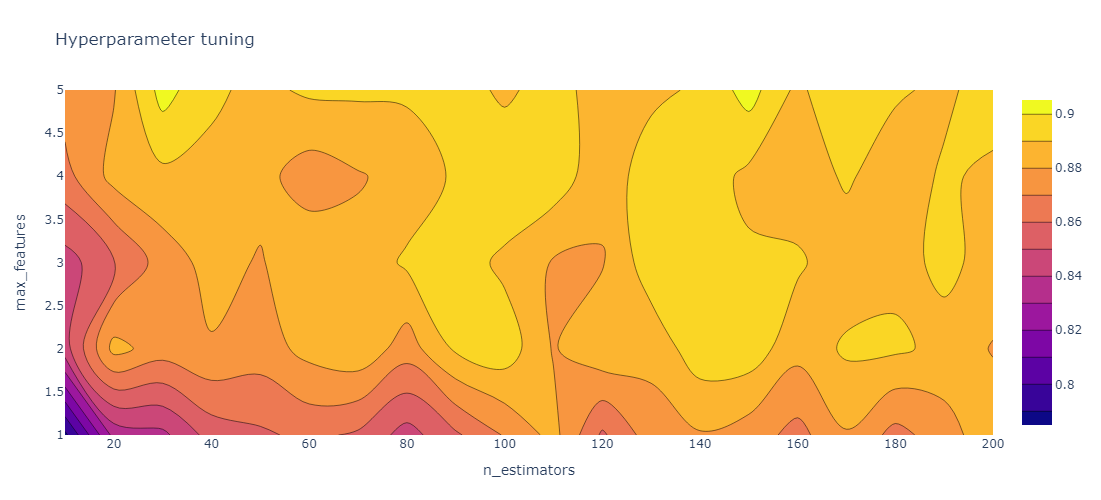

In [105]:
import plotly.graph_objects as go

# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_features') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

# **3D Surface Plot**

Let's add an extra dimension to the plot and we now have a 3D surface plot. The cool thing about this plot is that you can rotate the graph.

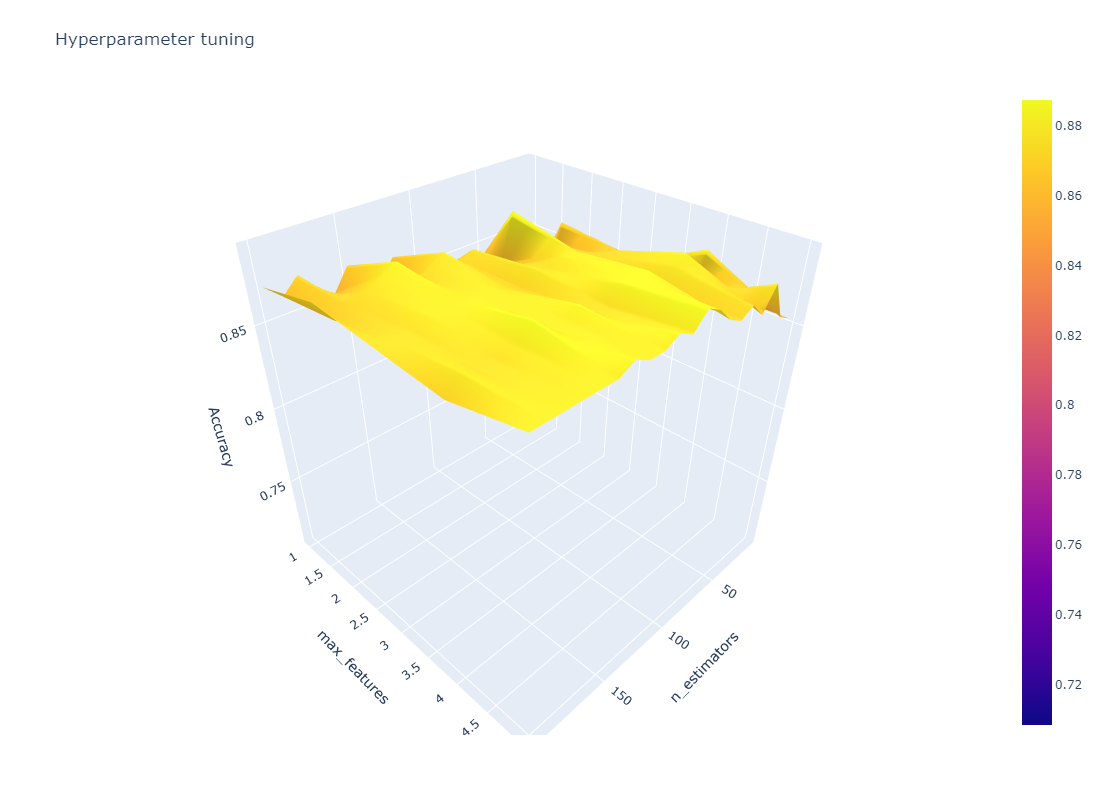

In [79]:
import plotly.graph_objects as go


fig = go.Figure(data= [go.Surface(z=z, y=y, x=x)], layout=layout )
fig.update_layout(title='Hyperparameter tuning',
                  scene = dict(
                    xaxis_title='n_estimators',
                    yaxis_title='max_features',
                    zaxis_title='Accuracy'),
                  autosize=False,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

---